<img   src="../figuras/logos/Logo TalentQ Azul.png" align=right  width="12%"/>
<br>


<table width="100%">
<td style="font-size:40px;font-style:italic;text-align:left;background-color:rgba(0, 220, 170,0.7)">
Operadores
</td></table>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\ketbra}[2]{| #1\rangle  \langle #2|} $
$ \newcommand{\tr}{{\rm tr}} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\V}{{\cal V}} $
$ \newcommand{\Lin}{\hbox{Lin}} $


In [16]:
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex

# Operadores y Matrices
  

En un espacio vectorial, además de los vectores, será esencial entender la manera en que estos se pueden transformar entre sí,



<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Definición</b> : 
<br>
un <i>operador lineal</i> es una aplicación  que transforma un vector  en otro 
<br>
<br>
$$
A: \ket{u} ~~\to ~~ \ket{v}   
$$
<br>    
de forma <i>lineal</i>.   
<p>
</div>

 
$$
A: (\alpha\ket{u} + \beta\ket{w})~~\to ~~ \ket{v} =\alpha A\ket{u} + \beta A\ket{w}
$$ 

<br>
<div class="alert alert-block alert-danger",text-align:center>
<p style="text-align: left ">  
<b> Notación : </b>  
    escribimos también $\ket{v} = A\ket{u} \equiv \ket{Au}$ $~~$(donde $Au$ debe entenderse como una etiqueta)
<br>
</div>

<div class="alert alert-block alert-warning">
<b>Ejemplo:</b> 
<br>   un <i>operador</i>  fácil de visualizar es el operador de <i>rotación en un plano</i>. Dado un ángulo $\theta \in (0,2\pi)$ el operador $A = R(\theta)$ gira cualquier vector un ángulo $\theta$ en el sentido antihorario
<br>
<br>
Un vector en el plano ${\bf u} =  (u_1,u_2)$  es equivalente al número complejo $u = u_1 + i u_2$ en el plano complejo $V = {\mathbb C}$.

    
Escrito en polares, $u=|u|e^{i\phi}$, y sabemos que una rotación de ángulo $\theta$ es equivalente a añadirle dicho  ángulo a la fase 
<br>
<br>
$$
 v = R(\theta) u = |u| e^{i(\phi + \theta)} =  |u| e^{i\phi } e^{i\theta} = u\cdot e^{i\theta} 
$$
<br>    
Por tanto, para rotar un número complejo un ángulo $\theta$ basta con multiplicarlo por la fase $e^{i\theta}$, que se corresponde con el operador $R(\theta)$ en el espacio vectorial $V = \mathbb{C}$.   

    
    
La propiedad fundamental de una rotación es la de mantener invariante el módulo  $|v| = |u|$.    
</div>


<div class="alert alert-block alert-success">
    <b>Ejercicio:</b>
Usando el ejemplo anterior, define una función $R$, que recibe un vector en el plano $(u_1,u_2)$ y devuelve el vector $(v_1,v_2)$ de componentes rotadas un ángulo $\theta$.
         
</div>
<br>
<details>
<summary><p style="text-align:left"> >> Solución </p></summary>

    def R(u1,u2,theta):
        u = u1 + u2*1j
        v = u*np.exp(1j*theta) # u rotado un angulo theta
        return v.real,v.imag    

</details>  

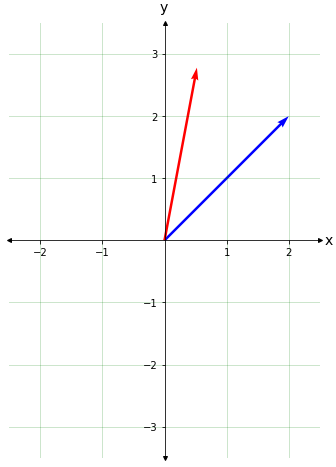

In [4]:
'''ángulo que queremos rotar'''
theta=0.6 

'''vector a rotar'''
u1=2.
u2=2.

'''v1 y v2 a partir de u1, u2 y theta'''
def R(u1,u2,theta):
        u = u1 + u2*1j
        v = u*np.exp(1j*theta) # u rotado un angulo theta
        return v.real,v.imag
    
v1,v2 =  R(u1,u2,theta)

''' Representación en el plano complejo '''
v = v1**2+v2**2
tQ.plot_2D_plane(left=-int(abs(v1))-2,right=int(abs(v1))+2,up=int(abs(v2))+1,down=-int(abs(v2))-1)
tQ.draw_vector(u1,u1,vcolor='b')
tQ.draw_vector(v1,v2,vcolor='r')


## Matriz de un operador
<a id='matriz_op'></a>



*Dada una base* $\ket{i}$

$\Rightarrow $  un vector queda especificado por una *columna de  componentes* 

$$
\ket{v} \sim \begin{pmatrix} v_1 \\ v_2\\ \vdots \\ v_N\end{pmatrix}
$$


$\Rightarrow $  un operador queda definido por una *matriz de componentes*. 

$$
A \sim \begin{pmatrix} 
A_{11} & A_{12} & \cdots & A_{1N} \\
A_{21} & A_{22} & \cdots & A_{2N} \\
\vdots & \vdots &  \ddots      & \vdots \\
A_{N1} & A_{N2} &    \cdots    & A_{NN}
\end{pmatrix}
$$


Efectivamente, en una base, la relación $\ket{v} = A\ket{u}$ equivale a una ecuación que relacione las componentes de ambos vectores
$$
v_i = \sum_{j=1}^N A_{ij} u_j  \, .
$$

Esta operación se corresponde con la siguiente composición de matrices

$$
\begin{pmatrix}
v_1 \\ v_2 \\ \vdots \\ v_N \end{pmatrix} =  \begin{pmatrix} 
A_{11} & A_{12} & \cdots & A_{1N} \\
A_{21} & A_{22} & \cdots & A_{2N} \\
\vdots & \vdots &  \ddots      & \vdots \\
A_{N1} & A_{N2} &    \cdots    & A_{NN}
\end{pmatrix}
 \begin{pmatrix} 
u_1 \\ u_2 \\ \vdots \\ u_N\end{pmatrix} \hspace{4cm}
$$

<div class="alert alert-block alert-warning">
    <b>Ejemplo:</b> 
<br>    Continuando con el ejemplo del operador de rotación en un plano, hemos visto que las componentes de $u = u_1 + i u_2$ y las de $R(\theta)u = v = v_1 + i v_2$ se obtienen mediante la multiplicación por una fase pura 
\begin{eqnarray}
v&=& u e^{i\theta} \\
\end{eqnarray}
    
Vamos a desarrollar cada miembro en cartesianas, separando las partes real e imaginaria
<br>    
\begin{eqnarray}
v_1 + i v_2 &=& (u_1 + iu_2) (\cos \theta + i \sin \theta)  \\
    \rule{0mm}{6mm}
    &=& (\cos\theta \, u_1 - \sin \theta\,  u_2) + i(\sin\theta\,  u_1 + \cos \theta\,  u_2)
\end{eqnarray}
<br>
    
es decir las coordenadas del vector origen y el vector rotado imagen se relacionan en la  forma 

<br>
\begin{eqnarray}
v_1 = \cos\theta \, u_1 - \sin \theta\,  u_2 ~~~~~~~,~~~~~~~~
v_2 = \sin\theta \, u_1 + \cos \theta\,  u_2     
\end{eqnarray}
<br>

que podemos expresar en forma matricial
    
$$
\begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta &\cos\theta\end{pmatrix} \begin{pmatrix} u_1 \\ u_2 \end{pmatrix}
$$    
    
  
    
    
</div>


# Base de Operadores  

## Producto externo 
<a id='base_canonica'></a>

 Dependiendo del orden en que los compongamos, $~\braket{u}{v}~$ ó $~\ketbra{v}{u}~$, el resultado es  muy distinto
<br>

- El **producto interno**, o *producto escalar* es un *número complejo*
<br>

$$
 a = \braket{u}{v} = \braket{v}{u}^* 
$$

- El **producto externo**  es un *operador*
<br>

$$
A = \ketbra{v}{u}
$$

Para comprender por qué es un operador, observamos que dicha expresión aplicada a un vector $\ket{w}$ da otro, <br>

$$
A : \ket{w} ~\to ~ A\ket{w} =  \ket{v}\braket{u}{w}=\ket{v} b  = b \ket{v} 
$$ 

<div class="alert alert-block alert-danger">
<b>Notar:</b> 
<br>
1.     El <b>orden</b> en que escribimos las cosas es <b>muy</b> relevante.
<br> 
<br>   
$\Rightarrow$ 
$\braket{u}{v}$ y $\ketbra{v}{u}$ son objetos <i> radicalmente distintos</i>: el primero es un número y el segundo es un operador. 
<br>  
<br>    
$\Rightarrow$  En cambio $\ket{v} b  = b \ket{v}$, así como $\bra{u}b = b\bra{u}$, es decir,  los números complejos y los $kets$ o $bras$ pueden escribirse en cualquier orden (decimos que conmutan).
<br>
<br>
2.    La acción del operador  $A = \ket{v}\bra{u}$ es muy fácil de expresar con palabras: 
<br>  
    
- el operador $A$ toma <i>cualquier vector</i> $\ket{w}$ y lo convierte en un vector <i>paralelo</i> a $\ket{v}$ proporcionalmente a su proyección $b=\braket{u}{w}$. 
<br>    
- si la proyección es nula $b=0$, el operador <i>aniquila</i>, es decir, da el elemento neutro.
<div>

### Producto externo en componentes

La diferencia entre el *producto interno* $a=\braket{u}{v}$ y el *externo* $A=\ketbra{u}{v}$ tiene su reflejo en una base expresando ambos vectores, $\ket{u} = \sum_i u_i\ket{i}$ y $\ket{v} = \sum_j v_j \ket{j}$,  en componentes en una base ortonormal

-  el *número complejo* $a$  es el *producto escalar*
$$
 a = \braket{u}{v}  = \begin{pmatrix} u_1^*,...,u_N^*\end{pmatrix}
\begin{pmatrix} v_1 \\ \vdots \\ v_N\end{pmatrix}\, =  \sum_i u_i^*v_i
$$

-  la matriz $A_{ij}$    *representa* el operador $A$ en la base $\{\ket{i}=\ket{e_i}\}$

$$
A = \ketbra{v}{u} ~\sim ~\begin{pmatrix} v_1 \\ \vdots \\ v_N\end{pmatrix}
\begin{pmatrix} u_1^*,...,u_N^*\end{pmatrix} ~=~ 
\begin{pmatrix} v_1 u_1^* & v_1u_2^* & ... & v_1 u_N^* \\
v_2 u_1^* & v_2 u_1^*& ... & v_2 u_N^* \\ \vdots & \vdots  & \ddots & \vdots \\
v_N u_1^* & & ... & v_N u_N^* \end{pmatrix} ~ = ~A_{ij}
$$

<br>

## Base canónica de operadores
<a id='base_canonica'></a>

Consideremos el *producto externo* de dos elementos de la base ortonormal
$\ketbra{i}{j}$
<br>

- La acción de $\ketbra{i}{j}$ sobre otro vector, $\ket{k}$,  de la base es sencilla 
<br>

$$
 \ket{i}\braket{j}{k} = \ket{i} \delta_{jk} = \left\{ \begin{array}{rl}
0 & {\rm si} ~~k\neq j \\ \ket{i} & {\rm si} ~~ k=j \end{array} \right.
$$

- La matriz asociada al operador  tiene sólo un 1 en el elemento $(ij)$ y cero en todos los demás. Por ejemplo, supongamos que 
$N=4$ 

<br>

$$
\ketbra{2}{3} ~\to ~~
 \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\begin{pmatrix} 0 & 0 & 1 & 0 \end{pmatrix} = 
\begin{pmatrix}
0 &  0 & 0 &  0 \\  0 &  0 & 1&  0 \\ 0 &  0 & 0 &  0 \\ 0 &  0 & 0 &  0
\end{pmatrix} ~~\Rightarrow ~~ A_{ij} = \delta_{i2}\delta_{j3}
$$

<br>


Los <i>elementos de matriz</i> $A_{ij}$ expresan las componentes de un operador en la <b>base de operadores</b> $\ketbra{i}{j}$


$$
A ~=~ \sum_{i,j=1}^N A_{ij} \ketbra{i}{j} 
$$

<details>
<summary><p style="text-align:left"> >><i>Consistencia</i> </p></summary>
Verifiquemos que actúa de la forma correcta
$$
\begin{array}{rcl}
A |u\rangle &=&  \sum_{i,j} A_{ij} \ketbra{i}{j}  \left(\sum_k u_k |k\rangle \right) \\
&\stackrel{\rm linealidad}{=} \rule{0mm}{6mm}& \sum_{i,j} \sum_k A_{ij} | i\rangle  \,   u_k \langle j| k\rangle \nonumber\\
&\stackrel{\rm ortonormalidad}{=}\rule{0mm}{6mm}& \sum_{i,j,k} A_{ij} | i\rangle  \,   u_k \delta_{jk}\\
&=\rule{0mm}{6mm}&\sum_{ij} A_{ij}\,|i\rangle \, u_j= \sum_i \left(\sum_{j} A_{ij}\, u_j\right)  |i\rangle    \\
&=\rule{0mm}{6mm}&\sum_i v_i \ket{i} \nonumber\\
&=\rule{0mm}{6mm}&   | v\rangle
\end{array}
$$
</details>

### Elementos de matriz

De la misma manera que obteníamos las componentes de un vector proyectando sobre un elemento de la base

$$
v_i = \braket{i}{v}
$$

ahora podemos obtener los *elementos de matriz* de un operador $A$ en la forma

$$  A_{ij} = \bra{i} A \ket{j} $$

<div class="alert alert-block alert-success">
<b>Ejercicio:</b>$~$
<br>
comprueba la consistencia de las expresiones $~A = \sum_{i,j=1}^N A_{ij} \ketbra{i}{j} $ y $~A_{ij} = \bra{i} A \ket{j}$
</div>
<details>
<summary><p style="text-align:right"> >> <i>Solución:</i> </p></summary>

aquí tu solución

</details>    


<div class="alert alert-block alert-warning">
<b>Resumen:</b> 
<br>     
Dada una base $\{\ket{i}\}$ podemos expresar un operador mediante una matriz $A_{ij}$. La relación concreta es 
<br>
<br>
- como operador $\to ~ A = \sum_{ij} A_{ij}\ketbra{i}{j}$
<br>
<br>    
- como elemento de matriz $\to ~ A_{ij} = \bra{i}A\ket{j}$
<br>   
</div>    

### Cambio de base 

Dos bases ortonormales $\ket{e_i}$ y $\ket{\tilde e_i}$ se relacionadas linealmente mediante una matriz

$$ \ket{e_j} \to \ket{\tilde e_j} = \sum_{ij}U_{ij} \ket{e_i}$$


La relación *adjunta* es muy sencilla de obtener

$$ \bra{e_j} \to \bra{\tilde e_j} = \sum_{ij}U^*_{ij} \bra{e_i}$$




En cada base, un operador $A$ *se representa* mediante elementos de matriz distintos

$$
 A_{ij} = \bra{e_i} A \ket{e_j} ~~~~,~~~~~ \tilde A_{ij} = \bra{\tilde e_i} A \ket{\tilde e_j} \, .
$$



Podemo encontrar la relación sustituyendo el cambio de base

\begin{eqnarray}
\tilde A_{ij} &=& \bra{\tilde e_i} A \ket{\tilde e_j} \\ \rule{0mm}{8mm}
&=& \sum_{k}U^*_{ki}\bra{e_k} ~A~ \sum_l U_{lj}\ket{e_l} \\ 
&=&  \sum_{k,l} U^\dagger_{ik}\bra{e_k} A  \ket{e_l}U_{lj}   = \sum_{k,l} U^\dagger_{ik}A_{kl} U_{lj} \, .
\end{eqnarray}

<div class="alert alert-block alert-info",text-align:center>
    <p style="text-align: left ;color: navy;"> <b> Lema </b>: 
<br>        
 bajo un cambio de bases ortonormales $ \ket{e_j} \to \ket{\tilde e_j} = \sum_{i}U_{ij} \ket{e_i}$ las componentes de un vector $\ket{v}$ y de  un operador $A$ cambian siguiendo la regla:
<br>
<br>        
\begin{eqnarray}
\tilde v_i &=& (U^\dagger \cdot v)_i \\ \rule{0mm}{12mm}
\tilde A_{ij} &=& (U^\dagger \cdot A \cdot U)_{ij}
\end{eqnarray}
        
</div>


<div class="alert alert-block alert-danger">
<b>Notar:</b> 
<br>  
la regla mnemotécnica es que las columnas se multiplican por $U^\dagger\cdot$ y las filas por $\cdot\, U$
<br>    
    
$$
\begin{pmatrix} \tilde v_1 \\ \vdots \\ \tilde v_N \end{pmatrix} = 
U^\dagger \cdot \begin{pmatrix} v_1 \\ \vdots \\  v_N \end{pmatrix} ~~~~
~~~~~~~;~~~~~~~~
\begin{pmatrix} 
\tilde A_{11} & \cdots & \tilde A_{1N} \\
\tilde \vdots & \ddots & \vdots  \\
\tilde A_{N1} & \cdots & \tilde A_{NN} 
\end{pmatrix} 
 =  U^\dagger\cdot
 \overbrace{\begin{pmatrix} 
 A_{11} & \cdots &  A_{1N} \\
\tilde \vdots & \ddots & \vdots  \\
 A_{N1} & \cdots &  A_{NN} 
\end{pmatrix} }^{\large \cdot ~ U}
$$
    
</div>

<div class="alert alert-block alert-success">
<b>Ejercicio:</b>$~$
<br>    
Escribe una función $basis\_change$ que reciba una matriz $U_{ij}$ de cambio de base $\ket{\tilde e_j} = \sum_i{U_{ij}}\ket{e_i}$, la componentes $v_i$ de un vector, ó $A_{ij}$ de un operador, y devuelva las componentes $\tilde v_i~$ ó $~\tilde A_{ij}$ en la nueva base. 

La matriz $\begin{pmatrix} 0 & -i \\ i & 0\end{pmatrix}$ representa un operador $\sigma_y$ en la base $\{\ket{0},\ket{1}\}$. Escribe $\sigma_y$ en la base $\{\ket{\!+\!i}= \frac{1}{\sqrt{2}}(\ket{0}+i \ket{1}),\ket{\!-\!i}= \frac{1}{\sqrt{2}}(\ket{0}-i \ket{1})\}$
    
</div>

### Relación de completitud    
    
La acción del operador identidad es 

$$
I\ket{v} = \ket{v}
$$

En particular sobre todo elemento de la base $I\ket{i} = \ket{i}$. En otras palabras,
el operador identidad $I$ tiene por matriz $I_{ij}=\delta_{ij}={\rm diagonal}\, (1,1,...,1)$ con lo que
<br>

$$
I = \sum_{i}  \ketbra{i}{i}= \sum_{ij} \delta_{ij}\ketbra{i}{j} 
$$

Esta expresión se conoce también como <b>relación de completitud</b> o, también, <b>relación de cierre</b> y se utiliza muy frecuentemente.


<div class="alert alert-block alert-danger">
<b>Notar:</b> 
<br>
la relación de completitud es, en realidad, una propiedad de  <b> cualquier base</b>. Dicho de otro modo, si $\{\ket{e_i}\}$ y $\{\ket{\tilde e_i}\}$ son, ambas, bases entonces $I\ket{e_i} = \ket{e_ i}$ y $I\ket{\tilde e_j} = \ket{\tilde e_j}$, entonces $+1$ es el único autovalor de $I$ en cualquier base, y la descomposición espectral da
<br>
<br>
$$
I =  \sum_{i}  \ketbra{e_i}{e_i} =  \sum_{j}  \ketbra{\tilde e_j}{ \tilde e_j}\, .
$$
</div>

La relación de cierre, o completitud,  siempre **se puede insertar** en cualquier momento del cálculo. Se utiliza con frecuencia para efectuar cambios de base.

Por ejemplo, vamos a ver que el producto escalar $\braket{u}{v}$ puede calcularse en cualquier base

Sea $\ket{u} = \sum_i u_i\ket{e_i} = \sum_i \tilde u_i \ket{\tilde e_i}~~$  y $~~
\ket{v} = \sum_i  v_i\ket{e_i}=\sum_i \tilde v_i\ket{\tilde e_i}$ 
<br>
<br>



Entonces

$$ 
\braket{v}{u} = \bra{v} I \ket{u} = \bra{v}\left(\sum_i\ketbra{e_i}{e_i}\right)\ket{u} = 
\sum_i \braket{v}{e_i}\braket{e_i}{u} = \sum_i v_i^* u_i
$$ 
<br>
<br>
$$ 
\braket{v}{u} = \bra{v} I \ket{u} = \bra{v}\left(\sum_i\ketbra{\tilde e_i}{\tilde e_i}\right)\ket{u} = 
\sum_i \braket{v}{\tilde e_i}\braket{\tilde e_i}{u} = \sum_i \tilde v_i^* \tilde u_i
$$ 
<br>


# El Espacio Vectorial  $\Lin(\Hil)$

El <i>conjunto</i> de **todos** <i>los operadores lineales</i> sobre un espacio vectorial $\Hil$ tiene, de forma natural, una estructura de espacio vectorial que denominamos $\Lin(\Hil)$

En efecto, dados dos operadores,  $A$ y $B$ tanto la suma $C = A+B$ como la multiplicación por un número complejo $D=\lambda A$ son *nuevos operadores* definidos por su acción sobre un vector cualquiera $\ket{v}\in \Hil$


$$
C\ket{v} ~=~ (A + B) \ket{v} = A\ket{v} + B\ket{v}
$$


$$
D\ket{v} ~=~ (\lambda A) \ket{v} = \lambda (A\ket{v})
$$

## Operador Adjunto
<a id='opadj'></a>

    
La conjugación *adjunta* se puede extender a ${\rm L}(\Hil)$
<br><br>

$$
\dagger ~\to ~
\left\{
\begin{matrix}
z & \leftrightarrow  &  z^* \\
|u\rangle & \leftrightarrow &   \langle u | \\
A & \leftrightarrow & A^{\dagger}
\end{matrix}
\right. \hspace{5cm}
$$
<br>

y hay <b>dos reglas más</b> que permiten aplicar $\dagger$ a sumas y productos de <i> objetos </i> $a \in\{z,\ket{u},A\}$
<br>

- *linealidad* $( a + b)^\dagger = a^\dagger + b^\dagger $
<br>

- *trasposición* $(ab)^\dagger = b^\dagger a^\dagger$ (sólo relevante cuando $a$ y $b$ no conmuten)
<br>



Ejemplos
<br>
<br>
1. $
\ket{v} = A\ket{u} ~~~~\Leftrightarrow ~~~~\bra{v} = \bra{u}A^\dagger
~~$ donde el operador en la derecha actúa sobre el *bra* a su izquierda.
<br>
<br>
Notar que, como $\ket{v}^\dagger=\ket{Au}^\dagger = \bra{Au}$ la ecuación anterior implica
<br>
<br>
$$
\bra{Au} = \bra{u} A^\dagger
$$
<br>
2. 
$
\bra{w}A\ket{u}^* = (\bra{w}A\ket{u})^\dagger = \bra{u}A^\dagger\ket{w}
$



### Matriz adjunta

Estas reglas nos permiten obtener el adjunto de un operador


<br>


$$
A^\dagger = \sum_{ij}\left( A_{ij}\ketbra{i}{j}\right)^\dagger = \sum_{ij} \, \ketbra{j}{i}A_{ij}^* =  \sum_{ji} \, A_{ji}^*\ketbra{i}{j}
$$

donde en la última ecuación hemos intercambiado los nombres $i\leftrightarrow j$
<br>
<br>

Vemos que la matriz que representa $A^\dagger$ es la *matriz adjunta* de $A_{ij}$, es decir, la traspuesta y conjugada
<br>


$$
(A^\dagger)_{ij} = A^*_{ji} = (A^{*}_{ij})^t \equiv (A_{ij})^\dagger
$$

donde $^\dagger$ significa el adjunto de un operador a la izquierda, y de una matriz a la derecha.


Si $\Hil$ tiene dimensión $N$, un *operador general* $A\in \Lin(\Hil)$ se especifica mediante una matriz de $N^2$ números complejos $\Rightarrow A = A_{ij}\ket{e_i}\bra{e_j}$. 

$N^2$ números complejos equivalen a $2N^2$ números reales. 


En otras palabras: $A$  tiene $N^2$ grados de libertad complejos y, por tanto, ésta es la dimension del espacio ${\rm L}(\Hil)$ es  
<br>

$$ {\rm dim}_{\bf C}(\Lin(\Hil)) = N^2 ~~~ \Longleftrightarrow ~~~ {\rm dim}_{\bf R}(\Lin(\Hil)) =  2N^2
$$
<br>

# Clases de operadores

Dentro de $\Lin(\Hil)$ podemos definir subconjuntos de operadores que mantienen ciertas propiedades importantes. Algunos formarán subespacios vectoriales, y otros no.

Podemos definir dichas  **clases de operadores** pidiendo que satisfagan algúna *condición* o *restricción*.

## Operador Unitario
<a id='opunit'></a>

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Definición: </b> 
<br>    un <i>operador unitario</i> $U$ es tal que su <i>adjunto</i> es igual a su <i>inverso</i>
<br><br>    
$$
U^\dagger = U^{-1}  \, 
$$
<p>
</div>

Naturalmente, esta ecuación se traduce en la misma ecuación para las matrices asociadas en *cualquier base*
<br>
<br>
$$
(U_{ij})^\dagger = U_{ji}^* = U^{-1}_{ij}
$$
<br>
Veamos ahora por qué hemos definido esta clase de operadores.

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b>Teorema:</b>
<br>    
    La acción de un <i>operador unitario</i> conserva <i>intacto el producto escalar</i> de dos vectores cualesquiera. 
</div>

<details>
<summary><p style="text-align:left"> >><i>Demostración</i> </p></summary>

sea $U$ un operador unitario, y $\ket{\varphi'}=U\ket{\varphi}$ y $\ket{\psi'} = U\ket{\psi}$
dos vectores transformados por $U$, entonces

    
$$
\braket{\varphi'}{\psi'} = \left(\bra{\varphi}U^\dagger\right)U\ket{\psi} = \bra{\varphi} U^\dagger U \ket{\psi} = 
\braket{\varphi}{\psi}
$$



particularizando para $\ket{\varphi} = \ket{\psi}$ tenemos que un operador unitario *conserva la norma*.

$$
\|U \ket{\varphi}\| = \|\ket{\varphi}\|
$$

En particular, conserva  la <i>norma</i> de cualquier vector. 

Por tanto, conserva la *distancia* entre dos vectores $ d (\ket{v},\ket{w})= \| (\ket{v}-\ket{w}) \| $.

En un lenguaje más formal, se dice que un operador unitario es una *isometría* 

- La *composición* de  operadores unitarios  **es** unitaria

$$
(UV)^\dagger = V^\dagger U^\dagger = V^{-1}U^{-1} = (UV)^{-1} 
$$
    

Matemáticamente esto quiere decir que los operadores unitarios forman un *grupo*


- La <i>combinación lineal</i> de operadores unitarios **no es** unitaria
<br>

$$
 (a U+ bV)^\dagger = a^* V^\dagger+ b^* U^\dagger = a^* V^{-1}+ b^* U^{-1} \neq  (a U+ b V)^{-1}
$$


Matemáticamente esto quiere decir que los operadores unitarios **no forman** un *subespacio vectorial* de $\Lin(\Hil)$


- Por tanto, los operadores unitarios <i>no forman</i> un subespacio vectorial dentro de $\Lin(\Hil)$. 
<br>
<br>
La estructura matemática que forman se denomina <i>grupo</i>: el grupo unitario $U(d)$ actúa sobre $\Hil$ de dimensión $d$. 


- Aun así, forman una *variedad*: un conjunto continuo  que se puede parametrizar mediante una colección de parámetros, la *dimensión de la variedad*. 



- Como hay una relación 1 a 1 entre un operador una matriz (en una base), esa dimensión será igual a la *dimensión del conjunto de matrices unitarias* 


<div class="alert alert-block alert-success">
<b>Ejercicio:</b>
<br>    
Resta de  ${\rm dim}_{\bf R}({\rm L}(\Hil)) =  2N^2$ el número de ecuaciones que restringen la matriz de un operador 
unitario y halla así la  dimensión (real) del grupo $U(N)$ de <i> operadores unitarios</i> de dimensión $N$.
</div>

### Bases ortonormales

- Como caso particular, aplicando un operador unitario $U$ a una base ortonormal $\{\ket{e_i}\}$ obtenemos otra base ortonormal $\{\ket{\tilde e_i}\}$
<br>

$$
\left. \begin{array}{c}\ket{\tilde e_i} = U\ket{e_i}\\ U^{-1} =  U^\dagger \end{array} \right\}
~~~~ \Longleftrightarrow ~~~~\braket{\tilde e_i}{\tilde e_j} = \bra{\tilde e_i}U^\dagger U\ket{\tilde e_j} = \braket{e_i}{e_j} = \delta_{ij}
$$

<br>

- Inversamente, dadas dos bases ortonormales, $\{\ket{e_i}\}$ y $\{\ket{\tilde e_i}\}$, el operador que las relaciona es un operador unitario
    
$$ 
 \begin{array}{rcl} 
U = \sum_i \ketbra{\tilde e_i}{e_i} & \Rightarrow &  U\ket{e_j} = \ket{\tilde e_j} 
 \\ \rule{0mm}{10mm}
U^\dagger = \sum_i \ketbra{e_i}{\tilde e_i}  & \Rightarrow &    U^\dagger\ket{\tilde e_j} = \ket{e_j} ~~~\Rightarrow ~~~U^\dagger = U^{-1}
 \end{array}
$$


- Un  <i>operador ortogonal</i> es un caso particular de operador  unitario con *elementos de matriz reales*. El operador de rotación $R(\theta)$ que hemos estudiado al comienzo de este tema es un operador ortogonal. Es inmediato comprobar que 

$$ R(\theta)^\dagger =R(\theta)^t = R(-\theta) = R(\theta)^{-1}$$
    


In [ ]:
U=np.matrix([[1,1J],[1J, + 1]])/np.sqrt(2)
array_to_latex(U)

In [ ]:
Uadj=U.getH() # getH es un método de la clase matrix que devuelve la matriz conjugada hermítica
array_to_latex(Uadj)

In [ ]:
print('comprobamos que U es unitaria')

array_to_latex(np.dot(Uadj,U))

## Operador Normal
<a id='opnormal'></a>
    
<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
    <b> Definición: </b>  un operador $N$  es <i>normal</i> si conmuta con su adjunto
<br>
<br>    
$$
NN^\dagger = N^\dagger N
$$  
</div>

El siguiente teorema es de una gran importancia

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Teorema: </b>  si $N$  es un operador normal, entonces, existe una base en la cual, la matriz asociada
es diagonal
<br>
<br>
$$
[N,N^\dagger] = 0 ~~~~\Leftrightarrow ~~~~ N_{ij} = \bra{e_i}N\ket{e_j} = 
\begin{bmatrix} \lambda_1 &  & &  \\ & \lambda_2 & &  \\ & & \ddots &  \\ & & & \lambda_D \end{bmatrix}
$$
</div>

De hecho, podríamos tomar cualquiera de los dos enunciados como definición de un operador normal. Postpondremos la demostración de este importante resultado hasta que estudiemos autovalores

## Operador Hermítico
<a id='ophermit'></a>

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Definición: </b> un operador  $H$ es <i>Hermítico</i> (o <i>autoadjunto</i>)  si  verifica la siguiente ecuación 
<br>
<br>    
$$
H = H^\dagger 
$$   
</div>



Evidentemente, un *operador hermítico* $~\Rightarrow ~$ es un *operador normal*, pero a la inversa no tiene por qué ser verdad.

La *combinación lineal* de operadores *hermíticos*  con coeficientes *reales* **es**  *hermítica*
<br>
<br>
$$
C^\dagger = (a A + b B)^\dagger = a^* A^\dagger + b^* B^\dagger = aA + b B = C
$$

Matemáticamente: los operadores autoadjuntos forman un subespacio vectorial real $\hbox{Her}(\Hil) \subset \Lin(\Hil)$.

La composición de operadores hermíticos, en general **no es** hermítica
<br>
<br>
$$
(A B)^\dagger = B^\dagger A^\dagger = BA \neq AB
$$
<br>



Matemáticamente, no forman grupo salvo que $A$ y $B$ conmuten entre sí, en cuyo caso forman un *grupo Abeliano*


- La matriz asociada a un operador hermítico también se llama hermítica, y coincide con su traspuesta y conjugada
<br>

$$
A_{ij} = A^\dagger_{ij} \equiv  A^{*t}_{ij} = A^*_{ji}   \hspace{4cm}
$$



<div class="alert alert-block alert-danger">
    <b>Notar:</b>
<br>
A partir de cualquier operador $C\neq C^\dagger $ siempre podemos construir un operador hermítico $H=H^\dagger$ mediante la combinación lineal
<br>    

$$
H = C + C^\dagger
$$
<br>
donde $a$ es un número real. Esto se extiende trivialmente a las matrices que los representan en cualquier base
    
<br> 
$$
H_{ij} = C_{ij} + C_{ji}^*
$$ 
   
</div>

<div class="alert alert-block alert-success">
    <b>Ejercicio:</b>
<br>    
resta de  ${\rm dim}_{\bf R}({\rm L}(\Hil)) =  2N^2$ el número de ecuaciones que restringen la matriz de un operador 
hermítico y halla así la dimensión (real) de la  <i>subespacio vectorial de operadores hermíticos</i>. 
</div>

Si has hecho los dos últimos ejercicios  habrás encontrado la misma respuesta en ambos. Eso quiere decir que podría haber una relación entre matrices hermíticas y unitarias. 

## Operador semi-definido positivo

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Definición: </b> decimos que un operador  $A$ es <i>semi-definido positivo </i> (o, <i>no-negativo</i>)  si  verifica que
<br>
<br>    
$$
\bra{u} A\ket{u} \geq 0 
$$   
para todo $\ket{u}\in \Hil$. 
</div>

En este caso se dice que $A\geq 0$. Si la desigualdad es estricta $\bra{u} A\ket{u} \geq 0 \, \forall \ket{u}$, decimos que $A$ es un *operador positivo*, $A>0$.


El siguiente teorema es el equivalente al hecho de que un número real $a\in {\mathbb R}$ admite una raíz si y solo sí es no-negativo. 

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Teorema: </b> un $A$ hermítico, es <i>semi-definido positivo </i>   exite otro operador $B$ tal que 
<br>
<br>
$$   
A = B^\dagger B
$$   
para todo $\ket{u}\in \Hil$. 
</div>


<a id='opproyec'></a>
## Proyectores


El operador $P = \ketbra{u}{u}$ *proyecta* cualquier vector en la dirección de $\ket{u}$

$$
P \ket{w} = \ket{u}\braket{u}{w} = a \ket{u}
$$

donde $a = \braket{u}{w}$ es la *proyección* 

De su forma se siguen dos propiedades que caracterizan un operador de proyección 

- es hermítico 

$$
P^\dagger = \ketbra{u}{u} = P
$$

- es idempotente

$$
P^2 = \ket{u}\braket{u}{u}\bra{u} = \ketbra{u}{u} = P
$$

<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
<b> Definición: </b> 
un <i>proyector</i> es un operador hermítico que verifica la ecuación
<br><br>
$$
P^2 = P
$$
</div>
</table>

<div class="alert alert-block alert-danger">
    <b>Notar:</b>
<br>   
    El proyector es un operador <b>no-unitario</b>: la proyección <i>reduce</i> la norma
<br> 
Supongamos que $\ket{u}$ y $\ket{w}$ son vectores unitarios y distintos
<br>
<br>
$$
\| P\ket{w}\|^2 = \bra{w}P^\dagger P\ket{w} = \bra{w} P\ket{w}= \braket{w}{u}\braket{u}{w} = |\braket{u}{w}|^2 < \|\ket{u}\|\|\ket{w}\| = 1  
$$
<br>
donde hemos aplicado la <i>desigualdad de Cauchy Schwarz</i> estricta, al suponer que $\ket{u}\neq\ket{w}$.
</div>

<div class="alert alert-block alert-warning">

- ###  Matriz asociada a un proyector


Si $\ket{u} = \ket{e_1}$ el operador $P_1 = \ket{e_1}\bra{e_1}$ proyecta cualquier vector sobre su componente a lo largo de $\ket{e_1}$.    

En forma matricial
 $$
 \ket{e_1}\bra{e_1} = \begin{pmatrix} 1 & 0 & ...& 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ \vdots\\ 0 \end{pmatrix} =
 \begin{pmatrix} 1 & 0 &  \cdots & 0 \\ 0 & 0  & \cdots & 0 \\ 
 \vdots & \vdots &\vdots & \vdots  \\
 0  & 0 & \cdots & 0\end{pmatrix}
 $$
de modo que
$$
    \ket{e_1}\braket{e_1}{u} ~= ~\begin{pmatrix} 1 & 0 &  \cdots & 0 \\ 0 & 0  & \cdots & 0 \\ 
 \vdots & \vdots &\vdots & \vdots  \\
 0  & 0 & \cdots & 0\end{pmatrix} \begin{pmatrix} u_1 \\ u_2 \\ \vdots \\ u_N \end{pmatrix}
 = \begin{pmatrix} u^1 \\ 0 \\ \vdots \\ 0 \end{pmatrix} = u^1 \ket{e_1}
$$
    
</div>

<div class="alert alert-block alert-warning">
    
 Si $\ket{u} = \sum_i u^i\ket{e_i}$ es un vector unitario  $\|\ket{u}\|=1$, entonces el proyector a lo largo de $\ket{u}$ viene dado por
<br>
<br>
$$
P(u) = \ketbra{u}{u} = \sum_{i,j} u_i u^*_j \ketbra{e_i}{e_j}
$$
<br>
Es decir, le está asociada una matriz dada por $P_{ij}=u_iu^*_j$. Es trivial verificar que 
<br>
<br>
$$
P^2_{ik} = \sum_j P_{ij}P_{jk} = \sum_j u_i u^*_j u_j u^*_k = u_i\left(\sum_j u^*_j u_j\right) u_k = u_i u_k^* = P_{ik}
$$
<br>
como corresponde a un proyector.
    

</div>

 ### Proyector ortogonal



Sea $P = \ket{u}\bra{u}$ un proyector a lo largo de un vector $\ket{u}.~$
Entonces el operador $\Rightarrow  P_\perp = I - P$ verifica que

- es proyector 

$$~~ P_\perp^2 = P_\perp $$

- es perpendicular a $P$ 

\begin{eqnarray}
P_\perp P &=& (I - P) P = P - P^2 = P - P =  0 
\end{eqnarray} 
 
<br>



En resumen: 

dado un vector $\ket{u}$, podemos descomponer cualquier  otro vector $\ket{\psi}$ en sus proyecciones paralela y perpendicular

$$
\ket{\psi} = ( P + P_\perp) \ket{\psi} = a \ket{u} + b \ket{u_\perp} 
$$

donde $a = \braket{u}{\psi}$ y  $b = \braket{u_\perp}{\psi}$



El vector $u_\perp$ es *el único vector* que:
- está en el plano generado por $\ket{u}$ y $\ket{\psi}$
<br>
- es perpendicular a $\ket{u}$ 

<figure>
<a id='fig_ref'></a>
<center><img src="figuras/Projectors.png" align=center width='40%px'/></center>
<center></center>
</figure>


In [ ]:
d = 3

' generate a random vector'
u = tQ.random_ket(d)
display(array_to_latex(u))

' build the parallel and perpendicular projectors'
P_par = tQ.ket_bra(u,u);
P_perp = np.identity(d) - P_par

display(array_to_latex(P_par))
display(array_to_latex(P_perp))

In [ ]:

' check properties P^2 = P, and orthogonality '
A = P_par@P_par - P_par
B = P_perp@P_perp - P_perp
C = P_par@P_perp

display(array_to_latex(C))


' obtain parallel and perpendicular components of another vector'
v = tQ.random_ket(d)

v_par = np.dot(P_par,v)
v_perp = np.dot(P_perp,v)


print(tQ.braket(v_par,v_perp))

<div class="alert alert-block alert-success">
    <b> Ejercicio: </b>  (<i> reflector</i>)
<br>
Dado un vector unitario $\ket{u}$, escribe 
<br>    
<br>    
- el operador $R_u^{\perp}$ que refleja la componente perpendicular a $\ket{u}$ de cualquier  vector $\ket{\psi}$   
<br>
<br>
- el operador $R_{u}^{\|}$ que refleja la componente paralela a $\ket{u}$ de cualquier  vector $\ket{\psi}$  
<br>  
    
</div>

### Proyectores sobre un subespacio

Consideremos una base ortonormal $\{\ket{e_i}\}~,i=1,...,N $  de $\Hil$ y dividámosla en dos subconjuntos

$$
\{\ket{e_i}\},~ i=1,...,N_1 ~~~~~~~,~~~~~~~~\{\ket{e_{j+N_1}},~j=1,...,N_2   
$$

Cualquier vector admite una descomposición ortogonal 

\begin{eqnarray}
\ket{\psi} &~=~& \sum_{i=1}^N a_i \ket{e_i}   ~= ~ \sum_{i=1}^N a_i \ket{e_i} + \sum_{i=1}^{N_2} a_{i+N_1} \ket{e_{i+N_1}} ~\equiv ~ \ket{\psi_1} + \ket{\psi_2}\rule{0mm}{5mm}
\end{eqnarray}

con $\braket{\psi_1}{\psi_2} = 0$. 

Decimos que el espacio $\Hil$ se descompone en la *suma directa de subespacios ortogonales*

$$
\Hil = \Hil_1 \oplus \Hil_2 
$$

de dimensiones $N_1 + N_2 = N$,


Los operadores 

$$
P_1 = \sum_{i=1}^{N_1} \ket{e_i}\bra{e_i} ~~~~~~~,~~~~~~~~ P_2 = \sum_{i=1}^{N_2} \ket{e_{i+N_1}}\bra{e_{i+N_1}}
= I - P_1
$$

Verifican la ecuación que define un proyector

$$
P_1^2 = P_1~~~~~,~~~~P_2^2 = P_2
$$

Su acción extrae de un vector su componente en el subespacio asociado

$$
P_1 \ket{\psi} ~=~ \sum_{i=1}^{N_1} \ket{e_i}\bra{e_i} \left(\sum_{k=1}^N a_k \ket{u_k} \right) ~=~
\sum_{i=1}^{N_1} a_i \ket{e_i} ~=~ \ket{\psi_1}
$$

$$
P_2 \ket{\psi} ~=~ \sum_{i=1}^{N_2} \ket{e_{i+N_1}}\bra{e_{i+N_1}} \left(\sum_{k=1}^N a_k \ket{u_k} \right) ~=~
\sum_{i=1}^{N_1} a_{i+N_1} \ket{e_{i+N_1}} ~=~ \ket{\psi_2}
$$

Claramente verifican

$$
(P_1 + P_2)\ket{\psi} = \ket{\psi}
$$

En resumen, vemos que satisfacen 

$$
P_1 P_2 = P_2 P_1  = 0 ~~~,~~~~P_1 + P_2 = I
$$


Notar que $P_1 \neq P_v = \ketbra{v}{v}$ donde $\ket{v} = \sum_i \ket{i}$. Este operador proyectaría cualquier vector en la dirección de $\ket{v}$.

# Autovalores y autovectores
        


<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Definición: </b><i> Autovalores y autovectores</i>
<br>
Existen vectores, $\ket{\lambda}$ para los cuales la <i>la acción de un operador</i> $A$ devuelve un vector <i>paralelo</i> 
<br><br>
$$
A\ket{\lambda} = \lambda \ket{\lambda}\, 
$$
<br>    
Decimos que $\ket{\lambda}$ es un autovector (o vector propio) de $A$ con autovalor (o valor propio) asociado $\lambda\in {\mathbb C}$ 
</div>


Supongamos que $A$ tiene $d$ vectores propios $\ket{\lambda_j} = \sum_i v_{ij}\ket{e_i}, \, j=1,..,d$

Sea $U_{ij} = v_{ij}$ la matriz formada por las componentes de los vectores propios (apilados por columnas)

Entonces 

$$
A_{diag} = \begin{pmatrix} \lambda_1 & & \\ & \ddots & \\ & & \lambda_d \end{pmatrix} = U^\dagger A U
$$

In [25]:
A = np.matrix([[1, -1], [1, 1]])

eigvals, eigvecs = np.linalg.eig(A)
print('valprop =',eigvals)
#print('vecprop =',eigvecs)
array_to_latex(eigvecs)


valprop = [1.+1.j 1.-1.j]


<IPython.core.display.Latex object>

In [26]:
'verificamos que los autovectores son las columnas de v'

#m=0
m=1
array_to_latex(np.dot(A, eigvecs[:, m]) - eigvals[m] * eigvecs[:, m],prefix=r'A|\lambda_m \rangle -\lambda_m |\lambda_m\rangle =  ')

<IPython.core.display.Latex object>

In [27]:
' diagonalizamos A '
U = np.matrix(eigvecs);

array_to_latex(np.dot(U.getH(),np.dot(A,U)),prefix='A_{diag} = U^\dagger A U = ')

<IPython.core.display.Latex object>

<a id='subesprop'></a>
## Subespacio Propio 

Decimos que un autovalor $\lambda_k$ es $d_k$ <i>veces degenerado</i> si existen $d_k$ autovectores linealmente independientes,  $\ket{\lambda_k^{a}}$ con $a=1,...,d_k$ asociados al **mismo** autovalor
<br>
<br>
$$A\ket{\lambda_k^a} = \lambda_k \ket{\lambda_k^a}$$ 
<br>
Dichos autovectores generan un <i>subespacio propio</i> $S(\lambda_k)\subset \Hil$. 


Por ejemplo,  sea $\ket{u} = \sum_{a=1}^{d_k} c_a\ket{\lambda^a_k} $ una combinación de dichos vectores propios, entonces
<br>
<br>
\begin{eqnarray}
A \ket{u} 
=  \sum_{a=1}^{d_k} c_a A\ket{\lambda^a_k}  =  \sum_{a=1}^{d_k} c_a \lambda_k\ket{\lambda^a_k}  =   \lambda_k \sum_{a=1}^{d_k} c_a \ket{\lambda^a_k}  =\lambda_k\ket{u}
\end{eqnarray}
<br>
Por tanto $\ket{u}\in S(\lambda_k)$.


- El teorema de Gramm-Schmidt garantiza que podemos elegir (mediante un cambio adecuado) el conjunto $\{\ket{\lambda_{k}^a}\}\in (\lambda_k), a=1,...,d_k$ de forma que que sea una  <i>base ortonormal</i> 

$$\braket{\lambda_{k}^a}{\lambda_{k}^b}=\delta_{ab}$$

- El **proyector ortogonal** sobre el subespacio propio $S(\lambda_k)$ será

$$
P_k = \sum_{a=1}^{d_k} \ketbra{\lambda_{k}^a}{\lambda_{k}^a}
$$

<div class="alert alert-block alert-warning">
    <b>Ejemplo:</b>
    
- Llamemos $R_z(\theta)$ el operador que efectúa una rotación  en el plano  $(x,y)$ de ángulo $\theta$. Cuando $\theta = \pi$ encontramos las siguiente acción sobre los tres elementos $\{\hat{\bf x},\hat{\bf y},\hat{\bf z}\}$
de la base cartesiana
<br>    
\begin{eqnarray}
R_z(\pi)\hat{\bf x} &=&-\hat{\bf x}  \\ \rule{0mm}{6mm}
R_z(\pi)\hat{\bf y} &=& -\hat{\bf y}  \\ \rule{0mm}{6mm}
R_z(\pi)\hat{\bf z} &=& + \hat{\bf z}  
\end{eqnarray}    
<br>    
- Vemos que hay un autovector $\hat{\bf z}$ con autovalor $+1$ y dos autovectores $\hat{\bf x} $ y $\hat{\bf y} $
con autovalor $-1$. 
<br>
<br>
- El espacio ${\mathbb R}^3$ se divide en dos subespacios propios de $R_z(\pi)$, uno de dimensión 1 (a lo largo del eje $\hat{\bf z}$) y otro de dimensión 2 (en el plano $(\hat{\bf x},\hat{\bf y})$).
<br>
<br>    
- Los proyectores asociados serán
    
$$
P_{\hat{\bf z}}= \ket{\hat{\bf z}}\bra{\hat{\bf z}}=\begin{bmatrix} 0 & & \\ & 0 & \\ & & 1 \end{bmatrix}~~~,~~~
P_{\hat{\bf x}\hat{\bf y}}= \ket{\hat{\bf x}}\bra{\hat{\bf x}}+\ket{\hat{\bf y}}\bra{\hat{\bf y}}=\begin{bmatrix} 1 & & \\ & 1 & \\ & & 0 \end{bmatrix}~~~,~~~
$$
    
</div>

<a id='especopnormal'></a>

## Espectro de Operadores  


### Espectro de Operadores Normales

Recordemos la definición de un operador normal. $N$ será un operador normal si conmuta con su adjunto

$$
NN^\dagger = N^\dagger N
$$

La importancia de los operadores normales radica en el siguiente lema     

<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
<b> Teorema: </b> los autovectores de un operador normal asociados a dos autovalores <i>distintos</i>  son <i>ortogonales</i>
<br>  
<br>     
$$
\lambda_i\neq \lambda_j~~~~\Longleftrightarrow ~~~~ \braket{\lambda_i}{\lambda_j} = 0
$$
</div>
<details>
<summary><p style="text-align:right"> >> <i>Prueba:</i></p></summary>
<br>
De la ecuación de autovalores $N\ket{\lambda_j} =  \lambda_j \ket{\lambda_j}$, y de $NN^\dagger = N^\dagger N$, se sigue que
<br>
<br>
$$
\bra{\lambda_j}(N^\dagger - \lambda_j^*)(N - \lambda_j) \ket{\lambda_j} = \bra{\lambda_j}(N - \lambda_j)(N^\dagger - \lambda_j^*) \ket{\lambda_j}  = 0\,
$$
<br>
<br>
 de donde obtenemos $(N^\dagger - \lambda_j^*) \ket{\lambda_j} = 0 \Rightarrow \bra{\lambda_j} N = \bra{\lambda_j}\lambda_j$. Entonces
<br>
<br>
$$
\bra{\lambda_j}N\ket{\lambda_i} = \lambda_j \braket{\lambda_j}{\lambda_i} = \lambda_i \braket{\lambda_j}{\lambda_i} \, ,
$$
de donde se sigue que, para $\lambda_i \neq \lambda_j \Rightarrow \braket{\lambda_i}{\lambda_j} = 0$. 
</details>

En general, cada autovalor $\lambda_k$ será $d_k \geq 1$ veces degenerado. 

En ese caso hay  $\{\ket{\lambda^a_k}\}, a=1,...,d_k$ autovectores que generan el subespacio propio, $S(\lambda_k)\subset \Hil $, de dimensión $d_k$. 


Subespacios $S(\lambda_k)\perp S(\lambda_j)$ son ortogonales para $k\neq j$ según el lema. 
<br>

En resumen: siempre podemos encontrar una base  ortonormal de $\Hil$, formada por autovectores de un operador normal $N$

$$
I = \sum_k\sum_{a=1}^{d_k} \ket{\lambda^a_k}\bra{\lambda^a_k} ~~~~~~~~~~~;~~~~~~~~~ \braket{\lambda^a_j}{\lambda^b_k} = \delta_{ab}\delta_{jk}
$$

El proyector sobre el subespacio propio $S(\lambda_k)$ será

$$
P_k = \sum_{a=1}^{d_k} \ketbra{\lambda^a_k}{\lambda^a_k}
$$

### Espectro de Operadores Hermíticos

<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
El espectro de un operador hermítico  $A = A^\dagger$,  tiene dos propiedades importantes:
<br>
<br>     
 - 1. los <b>autovalores</b> de un operador hermíticos son reales $\lambda_i \in {\mathbb R}$.
<br>
<br>     
 - 2.  los <b>autovectores</b> $\ket{\lambda_i}$ de un operador hermítico asociados a autovalores distintos son ortogonales
<br>
<br>
$$
\lambda_i\neq \lambda_j ~~~\Longleftrightarrow ~~~\braket{\lambda_i}{\lambda_j} = 0\, .
$$
</p>
</div>

<details>
<summary>
<p style="text-align:left"> >> <i>Prueba:</i></p>
</summary>
<br>
1. Tomemos un autovector normalizado de $A$, $\ket{\lambda}$ de autovalor $\lambda$.
<br>
<br>
$$
\lambda = \bra{\lambda}A\ket{\lambda} =  (\bra{\lambda}A^\dagger\ket{\lambda})^* = (\bra{\lambda}A\ket{\lambda})^*= \lambda^* .~~~
$$   
<br>    
2. De hecho esta propiedad es cierta para operadores $N$, normales. Los operadores Hermíticos son normales.
De la ecuación de autovalores $N\ket{\lambda_j} =  \lambda_j \ket{\lambda_j}$, y de $NN^\dagger = N^\dagger N$, se sigue que
<br>
$$
\bra{\lambda_j}(N^\dagger - \lambda_j^*)(N - \lambda_j) \ket{\lambda_j} = \bra{\lambda_j}(N - \lambda_j)(N^\dagger - \lambda_j^*) \ket{\lambda_j}  = 0\,
$$
<br>
de donde obtenemos $(N^\dagger - \lambda_j^*) \ket{\lambda_j} = 0 \Rightarrow \bra{\lambda_j} N = \bra{\lambda_j}\lambda_j$. Entonces
<br>
$$
\bra{\lambda_j}N\ket{\lambda_i} = \lambda_j \braket{\lambda_j}{\lambda_i} = \lambda_i \braket{\lambda_j}{\lambda_i} \, ,
$$
de donde se sigue que, para $\lambda_i \neq \lambda_j \Rightarrow \braket{\lambda_i}{\lambda_j} = 0$. 
}
</details>

El conjunto de autovectores $\ket{\lambda_i}$ de un operador hermítico forma una base ortogonal. Puede normalizarse para formar una base ortonormal
<br>
<br>
$$
\braket{\lambda_i}{\lambda_j} = \delta_{ij}
$$

<div class="alert alert-block alert-success">
    <b>Ejercicio:</b>
<br>
    Escribe una función, $random\_hermitian$, que genere una matriz hermítica de dimensión $d$.
<br>    
    Comprueba en distintos casos que el espectro es real. 
 

### Espectro de Operadores Unitarios

<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
Los autovalores de un operador unitario son fases puras
<br><br>
$$
U^\dagger = U^{-1} ~~~\Longleftrightarrow ~~~\lambda_i = e^{i\phi_i}
$$ 
</div>

<details>
<summary><p style="color:grey;text-align:right"> >> <i>Prueba</i> </p></summary>

aquí tu prueba
    
</details>



### Espectro de Proyectores

<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
<b> Lema: </b>
los autovalores de un proyector sólo pueden ser $~0~$ ó $~1~$
<br><br>
$$
P^2= P ~~~\Longleftrightarrow ~~~\lambda_i \in \{0,1\}
$$ 
</div>

<details>
<summary><p style="color:grey;text-align:right"> >> <i>Prueba</i> </p></summary>
La ecuación 
    
$$ P^2 = P ~~~~~\Rightarrow ~~~~~~~~ P^2 \ket{u} = P\ket{u} $$

sólo tiene dos soluciones consistentes 
    
$$
P\ket{u} = \ket{u}~~~~~~~\hbox{y} ~~~~~~~~~~P\ket{u} = 0
$$
</details>



### Operadores que conmutan

Cuando dos operadores conmutan se dan ciertas propiedades algebraicas que son muy ventajosas. En cierto modo se parecen más a c-números. Veamos la primera.
 
 <div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
<b> Teorema </b>
<br>     
Dados dos operadores $A$ y $B$ que conmutan, existe una base $\{\ket{\lambda_i}\}$ de autovalores simultáneos de ambos operadores, es decir 
<br>
<br>
$$
A = \lambda_i^A\ketbra{\lambda_i}{\lambda_i} ~~~~,~~~~~ B= \lambda_i^B\ketbra{\lambda_i}{\lambda_i} 
$$
</div>
<details>
<summary><p style="color:grey;text-align:right"> >> <i>Prueba</i> </p></summary>
Supongamos que $A$ y $B$ conmutan. Entonces la acción de $A$ <i>estabiliza</i> los subespacios propios de $B$. 

Es decir, si $\ket{\lambda}$ es autoestado de $B$, entonces $B\ket{\lambda} = \ket{\mu}$ también es autoestado con idéntico autovalor. Se comprueba fácilmente
<br>
<br>
$$
A(B\ket{\lambda} ) = B(A\ket{\lambda}) = B(\lambda\ket{\lambda}) = \lambda (B\ket{\lambda})
$$
<br>

Por tanto $\ket{\lambda}$ y $B\ket{\lambda}$ pertenecen al <i>mismo subespacio propio</i>. Esto es lo que se entiende por <i>estabilizar el subespacio</i>. 


Si $\lambda$ es degenerado esto sólo asegura que $B\ket{\lambda} = \ket{\lambda'}$ pertenece al subespacio propio del mismo autovalor $\lambda$. 

Esto quiere decir que, dento de cada subespacio propio de $B$, podemos escoger la base que queramos. En particular podemos escoger una base que diagonalice $A$ dentro de dicho subespacio.     
</details>   

En otras palabras, dos operadores que conmutan, son diagonalizables simultáneamente. Su matriz en la base $\{\ket{\lambda_i}\}$ es

$$
A = \begin{bmatrix} \lambda^A_1 & & &  \\ & \lambda^A_2 & &   \\ & & \ddots &  \\ & & & \lambda^A_n 
\end{bmatrix}~~~~~~~,~~~~~~~~
B = \begin{bmatrix} \lambda^B_1 & & &  \\ & \lambda^B_2 & &   \\ & & \ddots &  \\ & & & \lambda^B_n 
\end{bmatrix}\, .
$$

## Descomposición de Operadores

<a id='descomespec'></a>
### Descomposición  espectral


<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
<b> Teorema Espectral </b>: 
<br>     
Para todo operador normal $N$ existe una base de  autovectores ortonormales,  $\{\ket{\lambda^a_k}\}$,  tales que  
$A$ admite la siguiente <b> descomposición espectral </b>
<br>
<br>
$$
N = \sum_{k=1}^d \lambda_k   P_k
$$
<br>     
donde $d=  {\rm dim}(\Hil)$ y $P_k = \sum_{a=1}^{g_k} \ketbra{\lambda^a_k}{\lambda^a_k}$ es el proyector sobre el subespacio propio $S(\lambda_k)$ si $\lambda_k$ es $g_k$ veces degenerado.
</p>
</div>

In [3]:
A = np.array([[1, 1], [-1, 1]])
array_to_latex(A)


<IPython.core.display.Latex object>

In [13]:
' Realizamos la descomposición espectral'
eigvals, eigvecs = np.linalg.eig(A)

eigvec0 = eigvecs[:,0]
P0 = tQ.ket_bra(eigvec0,eigvec0)
display(array_to_latex(P0,prefix='P_0='))

eigvec1 = eigvecs[:,1]
P1 = tQ.ket_bra(eigvec1,eigvec1)
display(array_to_latex(P1,prefix='P_1='))

'verificamos completitud'
array_to_latex(P0+P1,prefix='P_0 + P_1=')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
A_descomp_espect = eigvals[0]*P0+eigvals[1]*P1

array_to_latex(A_descomp_espect)

<IPython.core.display.Latex object>

La matriz $A_{ij}$ que expresa $A$ en la base $\ket{\lambda_i}$ es diagonal 

$$
A_{ij} = \bra{\lambda^a_i} A\ket{\lambda^b_j} =  \lambda_k \delta_{kj} \delta_{ab} =\begin{bmatrix} \lambda_1 &  &  &  &  \\ & \ddots & & & \\ & & \lambda_2 & &  \\&  & & \ddots & \\  & & & &  \lambda_N \end{bmatrix}
$$
<br>
donde $\lambda_k$ aparecerá $d_k$ veces repetido.

<div class="alert alert-block alert-danger">
    <b>Notar:</b>
<br>
<br>
El operador identidad tiene a cualquier vector por autovector $ I\ket{v} = \ket{v}$, con autovalores $\lambda_ i = 1$. Por tanto, en <b>cualquier base</b>, la matriz asociada a $I$ tiene la forma diagonal
$$
I_{ij} = \delta_{ij} = \begin{pmatrix} 1 &  &  &  \\ & 1 & &  \\ & & \ddots & \\ & & &  1 \end{pmatrix}
$$

La descomposición espectral de $I$ no es otra que la <b>relación de completitud</b>, que es cierta *para cualquier base*, ya que todas las bases son bases de autoestados de $I$
$$
I ~=~ \sum_{i=1}^N \ketbra{\lambda_i}{\lambda_i} ~=~ \sum_{i=1}^N \ketbra{e_i}{e_i}
$$
</div>

<div class="alert alert-block alert-success">
    <b> Ejercicio: </b> <br> 
escribe una función  $spectral\_decomp$ en python, que devuelva las dos listas $\lambda_i$ y $P_i$ asociadas a la decomposición espectral de un operador diagonalizable $A = \sum_i \lambda_i P_i$.   
</div>

### Descomposición Polar (PD)

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Teorema: 
<br>   
</b> todo operador $A\in \Lin(\Hil)$ admite la descomposición polar $A = UR$ donde $U$ es un operador unitario, y $R$ es un operador semi-definido positivo (sólo tiene autovalores positivos o cero) 


La descomposición polar es *única* y generaliza la representación polar de números complejos $z = r e^{i\phi}$ a operadores. 

El hecho de que $r\geq 0$ es la contrapartida a que $R$ sea semi-definida positiva. 

El factor $e^{i\phi}$ es análogo al hecho de que un operador unitario, como veremos, sólo tiene autovalores que son fases puras. 

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
<br>
escribe una función $random\_unitary$ que genere una matriz unitaria de dimensión $d$.
Comprueba en distintos casos que el espectro está formado por fases


In [ ]:
'''Método para construir una matriz unitaria arbitraria usando la descomposición polar'''
d = 3
A = np.matrix(np.random.rand(d,d)+ np.random.rand(d,d) * 1j)

#u, s, vh = linalg.svd(A, full_matrices=False)
u,r = la.polar(A)
    
R = np.matrix(r) 
' verificamos que R sólo tiene autovalores no-negativos '
Reigval, Reigvec = la.eig(R)
print(np.round(Reigval,3))

U=np.matrix(u) 
Display('$U = %s$'%MatrixToLatex(U))

''' Verifiquemos unitariedad '''
Display('$U^{\dagger}U = %s$'%MatrixToLatex(np.dot(U.getH(),U)))

''' verificamos que los autovalores de U son fases'''
np.round([la.eig(U)[0][i]*la.eig(U)[0][i].conjugate() for i in range(d)],5)

### Descomposición en Valores Singulares (SVD)


Vamos a enunciar este teorema para matrices. Concretamente el teorema habla de una matriz $m\times n$. Este tipo de matrices se corresponden con operadores $O \in \Lin(\Hil_A,\Hil_B)$ entre espacios de dimensiones $m$ y $n$.

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Teorema:</b>
<br>
Sea $A$ una matriz compleja $m\times n$. Entonces  admite la siguiente forma (<i>descomposición en valores singulares</i>)
<br>
<br>
$$
A = U\,\Sigma\, V^{\dagger} \, ,
$$
<br>
donde $U\in U(m)$, $V\in U(n)$ son matrices unitarias cuadradas y $\,\Sigma \,$ es una matriz rectangular $m\times n$ con $\lambda_1, ...,\lambda_r$ <i>valores singulares</i> reales y positivos   en la diagonal, donde $r\leq {\rm min}(m,n)$. 
    


In [ ]:
A = np.random.randn(3,2)+ 1j*np.random.randn(3,2)
display(array_to_latex(A,prefix='A='))
print( 'the shape of A is :', A.shape)


u, s, vh = la.svd(A, full_matrices=True)

print( 'the shape of u =',u.shape, ' s =', s.shape,' v =', vh.shape)

In [ ]:
U=np.matrix(u)
S=np.matrix(np.diag(s))
V=np.matrix(vh).getH()

display(array_to_latex(U,prefix='U='))
display(array_to_latex(S,prefix='S='))
display(array_to_latex(V,prefix='V='))

'''Verifiquemos unitariedad'''
display(array_to_latex(np.dot(U.getH(),U),prefix='U^{\dagger}U ='))
display(array_to_latex(np.dot(V.getH(),V),prefix='V^{\dagger}V ='))



## Traza

### Traza de un operador



<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Definición:</b> la traza de un operador $A$ se define como la suma
<br>
<br>    
$$
\tr A = \sum_ i \bra{e_i} A\ket{e_i} =  \sum_{i} A_{ii} 
$$
<br>
de sus elementos de matriz diagonales <u> en cualquier base </u>        
</div>  



Para ser consistente esta definición es necesario probar que no importa la base utilizada

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
    <b> Lema:</b> la traza de un operador es <i>independiente de la base</i> en la que se calcule
</div>  
<details>
<summary><p style="color:grey;text-align:right"> >> <i>Prueba</i> </p></summary>
*Prueba:*
\begin{eqnarray}
{\rm tr} A  &=&\sum_i A_{ii} =\sum_{i} \bra{i}A\ket{i} =\sum_{i} \bra{i}A\left( \sum_j\ketbra{\tilde j}{\tilde j}\right)\ket{i}
\nonumber\\
&=& \sum_{ij}\bra{i}A\ket{\tilde j} \braket{\tilde j}{i} = \sum_{ij}\braket{\tilde j}{i}\bra{i}A\ket{\tilde j}  \nonumber\\
&=& \sum_{j} \bra{\tilde j}\left(\sum_i\ketbra{i}{i}\right) A \ket{\tilde j}= \sum_{j} \bra{\tilde j}A\ket{\tilde j}\nonumber\\
&=& \sum_j \tilde A_{jj}
\end{eqnarray}
</details>

Por esta importante propiedad entonces la traza de $A$ es la suma de sus autovalores
<br>
<br>
$$
{\rm tr} A = \sum_i \bra{\lambda_i}A\ket{\lambda_i} = \sum_i \lambda_i
$$
siempre que $A$ sea diagonalizable en la base $\ket{\lambda_i}$
<br>
$$
A\ket{\lambda_j} = \lambda_i \ket{\lambda_i}
$$

La traza es una operación *lineal*
<br>
<br>
$$
{\rm tr} (A + B ) = {\rm tr}A + {\rm tr}B
$$

La traza de un producto de operadores tiene la propiedad de *cíclicidad*: es invariante bajo permutaciones  cíclicas de los operadores en su argumento. Por ejemplo, para tres operadores $A, B$ y $C$
<br>
$$
{\rm tr}(ABC)= {\rm tr}(BCA) 
$$

Sea el operador $A = \ketbra{u}{v}$ entonces 

$$ \tr \left(\rule{0mm}{5mm}\ketbra{u}{v}\right) = \sum_i \braket{e_i}{u}\braket{v}{e_i} = \bra{v}\left(\sum_i \ketbra{e_i}{e_i}\right) \ket{u} = \braket{v}{u}
$$

<div class="alert alert-block alert-success">
<b>Ejercicio:</b>$~$
demuestra este resultado
</div>

Para un producto de dos operadores, el anterior resultado implica que la *traza de un conmutador es cero*. Dicho de otra forma

$$
{\rm tr}(AB) = {\rm tr}(BA) ~~~\Rightarrow ~~~~{\rm tr}([A,B]) = 0 \, .
$$

<a id='#oper_scalprod'></a>

### $\Lin(\Hil)$ como un espacio de Hilbert

Para transformar $\Lin(\Hil)$ en un espacio de Hilbert sólo es necesario definir un producto escalar hermítico

<a id='trace_norm'></a>
<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
<b> Definición: </b> <i> (producto escalar) </i> 
<br>     
dados dos operadores $A, B \in \Lin(\Hil)$  definimos su <i> producto escalar </i>  $( A, B)\in {\mathbb C}$
<br> 
<br>
$$
( A, B)= {\rm tr}\left( A^\dagger B \right) 
$$
</div>


En una base tenemos que

$$
(A,B) = \sum_{ij} A^\dagger_{ij} B_{ji} = \sum_{ij} A^*_{ji} B_{ji}
$$

mientras que 

$$
(B,A) = \sum_{ij} B^\dagger_{ij} A_{ji} = \sum_{ij} B^*_{ji} A_{ji}
$$

Se sigue que  $(B,A) = (A,B)^*$. Además es trivial comprobar que  $(A,B+C) = (A,B) + (A,C)$, por lo que se trata de un producto escalar sesquilineal o hermítico. 

<a id='#oper_norm'></a>

### $\Lin(\Hil)$ como un espacio normado

Una **norma** definida sobre $\Lin(\Hil)  $es un una función real $ A\to  \| A\| \in {\mathbb R}$ con las propiedades 
que se han definido en una [sección anterior](../00_Formalismo/01_Vectores.ipynb#norm)

<a id='trace_norm'></a>
<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
<b> Definición: </b> <i> ($p$-norma Shatten) </i> : dado un operador $A\in \Lin(\Hil)$ la función  
<br> 
<br>
$$
\| A \|_p =  \left({\rm tr} \left(A^\dagger A\right)^{p/2} \right)^{1/p}
$$
define una norma, denominada <b>$p$-norma de Shatten</b>.
</div>


El operador $A^\dagger A$ es un operador con propiedades importantes:
 <br>
 - es hermítico y 
 <br>
 - es semi-definido positivo
 
 
 Es decir, $A^\dagger A$ sólo tiene autovalores reales positivos o  nulos $\mu_i \geq 0$. Su raíz cuadrada $s_i = \sqrt{\mu_i}$ reciben el nombre de <b> valores principales </b> de $A$

Los tres casos más frecuentes son

- $p=1$ **norma de la traza** $~\Rightarrow ~  \| A \|_1 =  {\rm tr} \sqrt{A^\dagger A}$
<br>


Esta norma es igual a la suma de los valores singulares de $A ~\Rightarrow ~\| A \|_1  = \sum_i^r s_i$, donde $s_i^2$ son los autvalores de $A^\dagger A$


- $p=2$ **norma de Frobenius** $~\Rightarrow ~ \| A \|_2 =  \sqrt{{ \rm tr} A^\dagger A }$
<br>

La norma de Frobenius es la que se obtiene a partir  del producto escalar $\|A\|_2 = (A,A)$


- $p=\infty$ **norma espectral** $~\Rightarrow ~  \| A \|_\infty = \lim_{p\to \infty} \| A \|_p$

Puede demostrarse que la norma espectral es equivalente a la siguiente definición

$$
\|A\|_\infty = \hbox{max}_{\ket{u}\in \Hil}\{ \|A\ket{u}\| ~~\hbox{con} ~ \|\ket{u}\| = 1\}
$$


<div class="alert alert-block alert-success">
<b>Ejercicio:</b>$~$
escribe una función en python $trace\_norm(A)$ que calcule la norma de la traza de un operador. 
</div>

### Distancia de traza

<i>Cualquier norma</i> permite definir una noción de *distancia* o *diferencia* entre dos operadores. 

<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
<b> Definición: </b> <i> (Distancia de traza) </i> 
<br>     
Se define la  <b> distancia de traza</b> entre dos operadores $A$ y $B$ como la norma de la diferencia
<br> 
<br>
$$
d(A,B) = \| A - B \|_1 
$$
</div>


# Funciones de Operadores   


## Funciones analíticas

Estamos acostumbrados a escribir funciones *de una variable real o compleja*. Por ejemplo $f(x)= x^2$, ó, $ f(z) = e^z$. 

Querríamos dar sentido a una función *de un operador* 
$
A \to f(A)
$

En el caso de que $f(z)$ sea una función analítica expresable como una serie de Taylor en torno a $x=0$ 

$$
f(z) = \sum_{n=0}^\infty \frac{1}{n!} f^{(n)}(0)\,  z^n
$$

tomaremos como **definición** la *misma serie* cambiando el argumento $x\to A$

$$
f(A) = \sum_{n=0}^\infty \frac{1}{n!} f^{(n)}(0)\,  A^n
$$



<div class="alert alert-block alert-danger">
    <b>Notar:</b> 
<br>
1. De la misma forma que, para funciones analíticas $f(z)^* = f(z^*)$, también la definición anterior asegura que 
$f(A)^\dagger = f(A^\dagger)$
    
</div>



### Exponencial de un operador

la exponencial de un operador será
$$
\exp(A) = e^A = I + A + \frac{1}{2} A^2 + \frac{1}{3!} A^3 + ...
$$


Una propiedad importante de la función exponencial es  $e^xe^y = e^{x+y}$.

La propiedad análoga para operadores *sólo es cierta cuando conmutan entre sí*. 

Para el caso genérico tenemos dos opciones



<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Teorema: </b><i>Baker-Campbel-Haussdorf</i> 
<br>
Sean $A,B\subset{\rm L}(\Hil)$ dos operadores lineales genéricos. Entonces
<br>
<br>
$$
e^A e^B = e^{\left({A+B + \frac{1}{2}[A,B] + \frac{1}{12}[A,[A,B]]+ \frac{1}{12}[B,[B,A]] + ...}\right)}
$$
<br>


Vemos que

-  Si $A$ y $B$ conmutan, 

$$[A,B]=0 ~\Leftrightarrow ~e^A e^B = e^{A+B}$$



-  Si el conmutador de $A$ y $B$  es un c-número 

$$[A,B]= c I  ~\Leftrightarrow ~  e^A e^B = e^{A+B + \frac{c}{2}}$$




-  El inverso de $e^A$ es $e^{-A}$. Efectivamente, como 

$$[A,A]=0 \Rightarrow e^A e^{-A} = e^{A-A} = e^0 = I$$

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Teorema: </b><i>Lie-Suzuki-Trotter</i> 
<br>
Sean $A,B\subset{\rm L}(\Hil)$ dos operadores lineales genéricos. Entonces
<br>
<br>
$$
e^{A+B} = \lim_{n\to\infty} \left(e^{{A/n}} e^{B/n}\right)^n
$$
<br>
</div>

Esta segunda opción es de uso muy frecuente en el contexto de la *simulación cuántica*. 

### Operadores unitarios a partir de hermíticos

Todo operador unitario $U$ se puede expresar como la exponencial imaginaria de un operador hermítico $H$

$$
U = e^{i H}
$$

Efectivamente, 

$$U^\dagger = \left(e^{i H}\right)^\dagger = e^{-i H^\dagger} = e^{-i H}=U^{-1}$$ 

por tanto, $U$ es unitario si y sólo si $H$ es hermítico.
<br>
<details>
<summary><p style="color:grey;text-align:right"> >> <i>Prueba</i> </p></summary>
\begin{eqnarray}
U^\dagger &=& \left( e^{iH}\right)^\dagger = \left( 1+ iH + \frac{1}{2}(i H)^2 + ...\right)^\dagger \\
&=& 1 - iH^\dagger  + \frac{1}{2}(-i)^2 (H^2)^\dagger + ... \\
&=& 1 - iH +\frac{1}{2} H^2 - ... \\
&=& e^{-iH}\\ \rule{0mm}{6mm}
&=& U^{-1}
\end{eqnarray}
</details>

## Funciones  generales 

No siempre $f(z)$ es analítica en torno a $z0$. Es el caso,  por ejemplo $f(z) = \exp(1/z)$. Por tanto, esta función no admite una expansión en serie de Taylor.

Aun así, si la función $f(z)$ existe,  el operador $f(A)$  también. Para construirlo es necesario recurrir a la forma *forma diagonalizada*



<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy">  <b> Teorema: </b> 
<br>    
Sea $A$ un operador diagonalizable, y sea $A= \sum_i \lambda_i \ket{\lambda_i}\bra{\lambda_i}$ su representación espectral. 
Entonces el operador $f(A)$ tiene la representación espectral siguiente
<br>  
$$
f(A) = \sum_i f(\lambda_i) \ket{\lambda_i}\bra{\lambda_i}
$$

En otras palabras, si la matriz $A^{(D)}_{ij} = \lambda_i \delta_{ij} $ es diagonal, cualquier función de la misma es, trivialmente, la matriz diagonal que se obtiene evaluando $f(\lambda_i)$

$$
f(A^{(D)}_{ij}) = \begin{bmatrix} f(\lambda_1)& &  & \\ & f(\lambda_2) & &  \\ & & \ddots & \\ & & & f(\lambda_n)\end{bmatrix}
$$                                            

<div class="alert alert-block alert-warning">
<b>Ejemplo 1:</b>
    
$$e^{1/A} = \sum_i e^{1/\lambda_i} \ket{\lambda_i}\bra{\lambda_i}$$

</div>

<div class="alert alert-block alert-warning">
<b>Ejemplo 2:</b>
    
\begin{eqnarray}
{\rm tr}(A \log A) &=& {\rm tr}\left[\left(\sum_j \lambda_j \ket{\lambda_j}\bra{\lambda_j}\right)\left(\sum_k\log \lambda_k \ket{\lambda_k}\bra{\lambda_k}\right)\right] ~=~  {\rm tr}\left[\sum_k \lambda_k \log\lambda_k \ket{\lambda_k}\bra{\lambda_k} \right] \\ \rule{0mm}{20mm}
&=& {\rm tr} \begin{bmatrix} \lambda_1 \log \lambda_1& &  & \\ &\lambda_2 \log \lambda_2 & &  \\ & & \ddots & \\ & & & \lambda_n \log \lambda_n
\end{bmatrix}
 ~= ~ \sum_k \lambda_k \log \lambda_k \rule{0mm}{8mm}
\end{eqnarray}
    
</div>

# Matrices de Pauli   


Las matrices hermíticas forman un subespacio vectorial $\hbox{Her}(\Hil)\subset \Lin(\Hil)$ que admite una base de matrices hermíticas

<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
<b> Definición: </b>  $~$ se definen las matrices de Pauli 
<br>
<br>
$$
\sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}~~~~~,~~~~~~~~~
\sigma_y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}~~~~~,~~~~~~~~~
\sigma_z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \, .
$$
</div>


<div class="alert alert-block alert-danger">
<b>Notar:</b> también se usan los subíndices enteros $\sigma_1=\sigma_x, ~
\sigma_2=\sigma_y$  y  $\sigma_3=\sigma_z$. 
<br>


Si añadimos la matriz identidad $~I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}~
$  el conjunto $\{I,\sigma_x,\sigma_y,\sigma_z\}$ forma una *base* para el espacio de *matrices hermíticas* $2\times 2$.  

\begin{eqnarray}
A = a_0 I + {\bf a} \cdot \boldsymbol{\sigma}  &=&   a_0 I + a_1 \sigma_1 + a_2 \sigma_2 + a_3 \sigma_3  = 
\begin{bmatrix}
a_0 + a_3 & a_1 - i a_2 \\ a_1 + i a_2 & a_0 - a_3
\end{bmatrix} = A^\dagger
\end{eqnarray}
con $a_i\in {\mathbb R}$ cuatro números reales.

En total,  las matrices de Pauli poseen tres propiedades que las hacen únicas

- son hermíticas $\sigma_i^\dagger = \sigma_i$

- son unitarias $\sigma_i^\dagger = \sigma_i^{-1} = \sigma_i$

- tienen traza nula $\tr(\sigma_i) = 0$


<div class="alert alert-block alert-success">
<b>Ejercicio:</b>$~$
verifica el segundo punto anterior
</div>

## Composición 

La composición de dos matrices de Pauli es otra matriz de Pauli que cumple la siguiente identidad
<br>

$$
\sigma_i \sigma_j = \delta_{ij}I + i\epsilon_{ijk}  \sigma_k
$$

donde 
$$\epsilon_{123} = \epsilon_{231}=\epsilon_{312}=1~~~~,~~~~\epsilon_{213} = \epsilon_{132}=\epsilon_{321}=-1$$

Ejemplos:

\begin{eqnarray}
\sigma_1\sigma_2 &=& i \sigma_3  \\
\sigma_2\sigma_1 &=& -i \sigma_3  \\
\sigma_2\sigma_1\sigma_2 &=& \sigma_2(i\sigma_3) = i^2 \sigma_1 = -\sigma_1\\
\sigma_2\sigma_2 = I
\end{eqnarray}

In [12]:
s0 = np.matrix([[1,0],[0,1]])
s1 = np.matrix([[0,1],[1,0]])
s2 = np.matrix([[0,-1j],[1j,0]])
s3 = np.matrix([[1,0],[0,-1]])


'verifica todas las opciones'
print(s1*s1==s0)
print(s1*s2==1j*s3)
print(s2*s1==-1j*s3)
print(s2*s1*s2==-s1)
print(s1*s1==s0)

[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]


<div class="alert alert-block alert-danger">
<b> Notas: </b> <br>
de las relaciones de composición anteriores se siguen inmediatamente las siguientes reglas de (anti) conmutación 
    
$$
\{\sigma_i,\sigma_j \} = 2\delta_{ij}~~~~~~~,~~~~~~~
~~~[\sigma_i,\sigma_j] = 2i\epsilon_{ijk}\sigma_k
$$
</div>

Las matrices de Pauli tienen traza nula
<br>

$$
{\rm tr} \, \sigma_i = 0
$$


Tomando la traza de la relación de composición obtenemos que las matrices de Pauli *son ortogonales* en el sentido siguiente
<br>

$$
(\sigma_i, \sigma_j) = {\rm tr}(\sigma_i\sigma_j) = {\rm tr}(\delta_{ij}I + i\epsilon_{ijk}  \sigma_k) = 2\delta_{ij}
$$


## Exponenciación


Consideremos  la  matriz hermítica siguiente

\begin{eqnarray}
A &=& {\bf a} \cdot \boldsymbol{\sigma} 
\end{eqnarray}
con $a_i\in {\mathbb R}$ tres números reales.

Separemos ${\bf a}$ en un módulo y una dirección unitaria

$${\bf a} = (a_1,a_2,a_3) =a \left( \frac{a_1}{a},\frac{a_2}{a},\frac{a_3}{a}\right) =  a\, \hat{\bf n}$$ 

donde $a=|{\bf a}|=\sqrt{a_1^2+a_2^3+a_3^2}~$  y $\hat{\bf n}$ es unitario


Entonces
<br>
$$
A =  {\bf a} \cdot \boldsymbol{\sigma} =  a\, \hat{\bf n} \cdot \boldsymbol{\sigma}
$$

Queremos hallar la exponencial $e^{iA}$

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Teorema: </b>  $~$ 
$$
\exp \left( \rule{0mm}{4mm} i\,   {\bf a} \cdot \boldsymbol{\sigma}  \right) = (\cos a)\, I + i (\sin a)\,\hat{\bf n} \cdot  \boldsymbol{\sigma} \, 
$$
<br>
</div>

Esto generaliza la fórmula de Euler  para una fase compleja 

$$ e^{i\alpha} = \cos\alpha + i \sin\alpha $$
<br>


<div class="alert alert-block alert-success">
<b> Ejercicio: </b> <br> 
Obtén la descomposición espectral de las tres matrices de Pauli, $\sigma_x, \sigma_y $ y $\sigma_z$.   
    
Utiliza esta descomposición para demostrar que
$$
e^{i \alpha\,  {\bf n}\cdot\boldsymbol{\sigma}} = \cos \alpha \, I + i \sin \alpha \, {\bf n}\cdot\boldsymbol{\sigma}
$$
</div>

In [13]:
from scipy.linalg import expm


avec = np.random.rand(3)
a = np.linalg.norm(avec)
nvec = avec/a
print('a=',a)
display(array_to_latex(nvec))

sigvec = np.array([s1,s2,s3])


adots= sum(list(avec[i]*sigvec[i] for i in range(3)))

'exponentiating'
e1 = expm(1j*adots)

'using the Euler-like formula'
ndots= sum(list(nvec[i]*sigvec[i] for i in range(3)))
e2 = np.cos(a)*s0 + 1j*np.sin(a)*(nvec[0]*sigvec[0]+nvec[1]*sigvec[1]+nvec[2]*sigvec[2])

'verify'
display(array_to_latex(e1,prefix='e1='))
display(array_to_latex(e2,prefix='e1='))


a= 1.201864719814993


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>